In [317]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import multivariate_normal as mvn
from util import plot_linear_boundary

# The Perceptron Model

$$
f(\mathbf{x}) = 
\begin{cases}
1 &\text{ if } \mathbf{w} \cdot \mathbf{x} + b > 0 \\
0 &\text{ otherwise}
\end{cases}
$$

## Data Generation

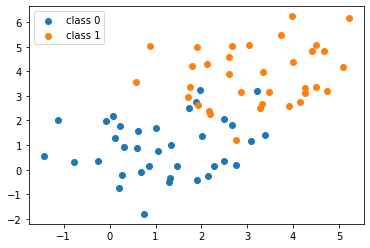

In [318]:
# Generate data
N = 50
seed = 123
X0 = mvn.rvs(mean=[1, 1], cov=np.eye(2), size = N, random_state=seed)
X1 = mvn.rvs(mean=[3, 4], cov=np.eye(2), size = N, random_state=seed)
Y0 = np.repeat(0, N)
Y1 = np.repeat(1, N)
X = np.concatenate([X0, X1], axis=0)
Y = np.concatenate([Y0, Y1], axis=0)

# Shuffle
shuffle_idx = np.arange(2*N)
shuffle_rng = np.random.RandomState(seed)
shuffle_rng.shuffle(shuffle_idx)
X, Y = X[shuffle_idx], Y[shuffle_idx]

# Train, test split
X_train, Y_train, X_test, Y_test = X[:70], Y[:70], X[70:], Y[70:]

# Plot the training set
fig, ax = plt.subplots()
ax.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], label="class 0")
ax.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], label="class 1")
ax.legend()
plt.show()


## Model Definition

In [319]:
class Perceptron():
    def __init__(self) -> None:
        self.weights = None
    
    def initialise_weights(self, n_features):
        self.weights = torch.rand(n_features, 1, dtype=torch.float32)
    
    def add_ones(self, X):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        X = torch.from_numpy(X).float()
        return X
    
    def forward(self, x):
        linear = torch.matmul(x, self.weights)
        return (linear > 0) * 1

    def train(self, X, y, epochs, rate):
        X = self.add_ones(X)
        y = torch.from_numpy(y).float()
        n_features = X.shape[1]
        self.initialise_weights(n_features)

        for e in range(epochs):
            for i in range(y.shape[0]):
                pred = self.forward(X[i])
                error = y[i] - pred
                self.weights += (rate * error * X[i]).view(n_features, 1)

    def predict(self, X):
        X = self.add_ones(X)
        linear = torch.matmul(X, self.weights)
        return (linear > 0) * 1

    def evaluate(self, X, y):
        pred = self.predict(X).view(-1).numpy()
        acc = sum(pred == y) / y.shape[0] * 100
        return acc

## Training and Evaluation

In [320]:
perceptron = Perceptron()

perceptron.train(X_train, Y_train, 100, 0.01)

train_acc = perceptron.evaluate(X_train, Y_train)
test_acc = perceptron.evaluate(X_test, Y_test)

print("Training accuracy: {:.2f}%".format(train_acc))
print("Test accuracy: {:.2f}%".format(test_acc))


Training accuracy: 92.86%
Test accuracy: 100.00%


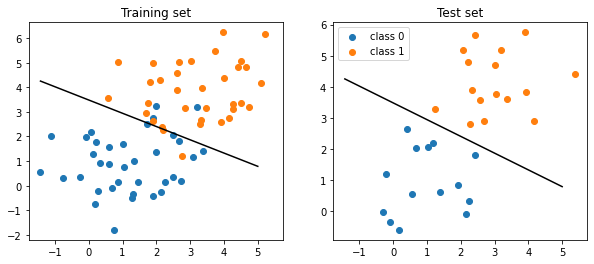

In [321]:
w = perceptron.weights.numpy()[1:]
b = perceptron.weights.numpy()[0]

plot_linear_boundary(X_train, Y_train, X_test, Y_test, w, b)